In [1]:
import pandas as pd
df = pd.read_csv('tickets.csv')

df['action_date'] = pd.to_datetime(df['action_date'])
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['view_date'] = pd.to_datetime(df['view_date'])




# Calculate time differences
df['creation_to_view_duration'] = df['view_date'] - df['creation_date']
df['creation_to_action_duration'] = df['action_date'] - df['creation_date']

df['creation_to_view_duration_hours'] = (df['view_date'] - df['creation_date']).dt.total_seconds() / 3600
df['creation_to_action_duration_hours'] = (df['action_date'] - df['creation_date']).dt.total_seconds() / 3600
df['action_to_view_duration_hours'] = (df['action_date'] - df['creation_date']).dt.total_seconds() / 3600

duration_performance = df[['user_team','user_actioned','creation_to_action_duration_hours','customer_problem_resolved']]
duration_performance

,user_team,user_actioned,creation_to_action_duration_hours,customer_problem_resolved
0,green,8ac38c,0.283333,False
1,green,8ac38c,1.183333,True
2,green,8ac38c,3.883333,True
3,green,8ac38c,3.633333,False
4,green,8ac38c,1.366667,True
...,...,...,...,...
25557,orange,54f00e,92.683570,False
25558,orange,54f00e,0.416667,False
25559,orange,54f00e,36.116903,False
25560,orange,54f00e,48.450236,True


In [2]:
df


,ticket_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team,creation_to_view_duration,creation_to_action_duration,creation_to_view_duration_hours,creation_to_action_duration_hours,action_to_view_duration_hours
0,live_chat,2023-06-02 08:35:00.000000000,2023-06-02 08:35:00.000000000,2023-06-02 08:52:00.000000000,2,False,8ac38c,green,0 days 00:00:00,0 days 00:17:00,0.000000,0.283333,0.283333
1,email,2023-06-02 08:14:00.000000000,2023-06-02 08:56:00.000000000,2023-06-02 09:25:00.000000000,3,True,8ac38c,green,0 days 00:42:00,0 days 01:11:00,0.700000,1.183333,1.183333
2,email,2023-06-02 06:03:00.000000000,2023-06-02 09:29:00.000000000,2023-06-02 09:56:00.000000000,5,True,8ac38c,green,0 days 03:26:00,0 days 03:53:00,3.433333,3.883333,3.883333
3,web_form,2023-06-02 06:42:00.000000000,2023-06-02 09:58:00.000000000,2023-06-02 10:20:00.000000000,2,False,8ac38c,green,0 days 03:16:00,0 days 03:38:00,3.266667,3.633333,3.633333
4,email,2023-06-02 09:24:00.000000000,2023-06-02 10:24:00.000000000,2023-06-02 10:46:00.000000000,5,True,8ac38c,green,0 days 01:00:00,0 days 01:22:00,1.000000,1.366667,1.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25557,web_form,2023-08-26 17:34:00.000000000,2023-08-30 13:40:00.850523820,2023-08-30 14:15:00.850523820,4,False,54f00e,orange,3 days 20:06:00.850523820,3 days 20:41:00.850523820,92.100236,92.683570,92.683570
25558,live_chat,2023-08-30 14:22:00.850523820,2023-08-30 14:22:00.850523820,2023-08-30 14:47:00.850523820,1,False,54f00e,orange,0 days 00:00:00,0 days 00:25:00,0.000000,0.416667,0.416667
25559,web_form,2023-08-29 03:27:00.000000000,2023-08-30 14:50:00.850523820,2023-08-30 15:34:00.850523820,1,False,54f00e,orange,1 days 11:23:00.850523820,1 days 12:07:00.850523820,35.383570,36.116903,36.116903
25560,email,2023-08-28 15:44:00.000000000,2023-08-30 15:36:00.850523820,2023-08-30 16:11:00.850523820,3,True,54f00e,orange,1 days 23:52:00.850523820,2 days 00:27:00.850523820,47.866903,48.450236,48.450236


In [7]:
average_durations_per_user = df.groupby(['user_team', 'user_actioned']).agg({
    'creation_to_view_duration_hours': 'mean',
    'creation_to_action_duration_hours': 'mean',
    'action_to_view_duration_hours':'mean'
}).reset_index()
average_durations_per_user.columns

Index(['user_team', 'user_actioned', 'creation_to_view_duration_hours',
       'creation_to_action_duration_hours', 'action_to_view_duration_hours'],
      dtype='object')

In [10]:
data=average_durations_per_user[['user_team','user_actioned', 'creation_to_action_duration_hours']]

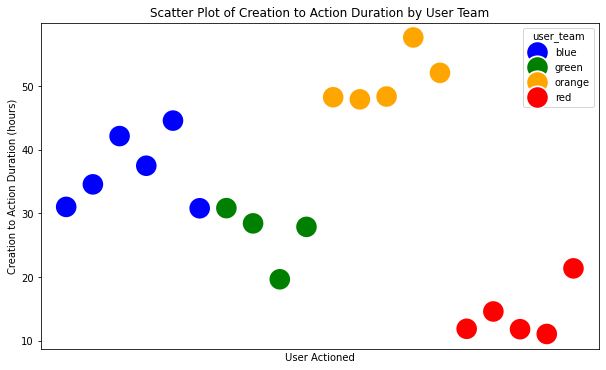

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define colors for each user team
colors = {'blue': 'blue', 'green': 'green', 'orange': 'orange', 'red': 'red'}

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='user_actioned', y='creation_to_action_duration_hours', hue='user_team', palette=colors, s=500)

# Set labels and title
plt.xlabel('User Actioned')
plt.ylabel('Creation to Action Duration (hours)')
plt.title('Scatter Plot of Creation to Action Duration by User Team')
plt.xticks([])
# Show the plot
plt.show()
